In [96]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import tensorflow
import keras
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from sklearn.metrics import classification_report

In [97]:
train_dir = 'xray_dataset_covid19/train'
test_dir = 'xray_dataset_covid19/test'

In [98]:
train_datagen = ImageDataGenerator(rescale=(1./255))
test_datagen = ImageDataGenerator(rescale=(1./255))

In [99]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (256, 256),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 148 images belonging to 2 classes.


In [100]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (256, 256),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 40 images belonging to 2 classes.


In [101]:
for data_batch, labels_batch in train_generator:
    print("Data batch shape:", data_batch.shape)
    print("Labels batch shape:", labels_batch.shape)
    break

Data batch shape: (32, 256, 256, 3)
Labels batch shape: (32, 2)


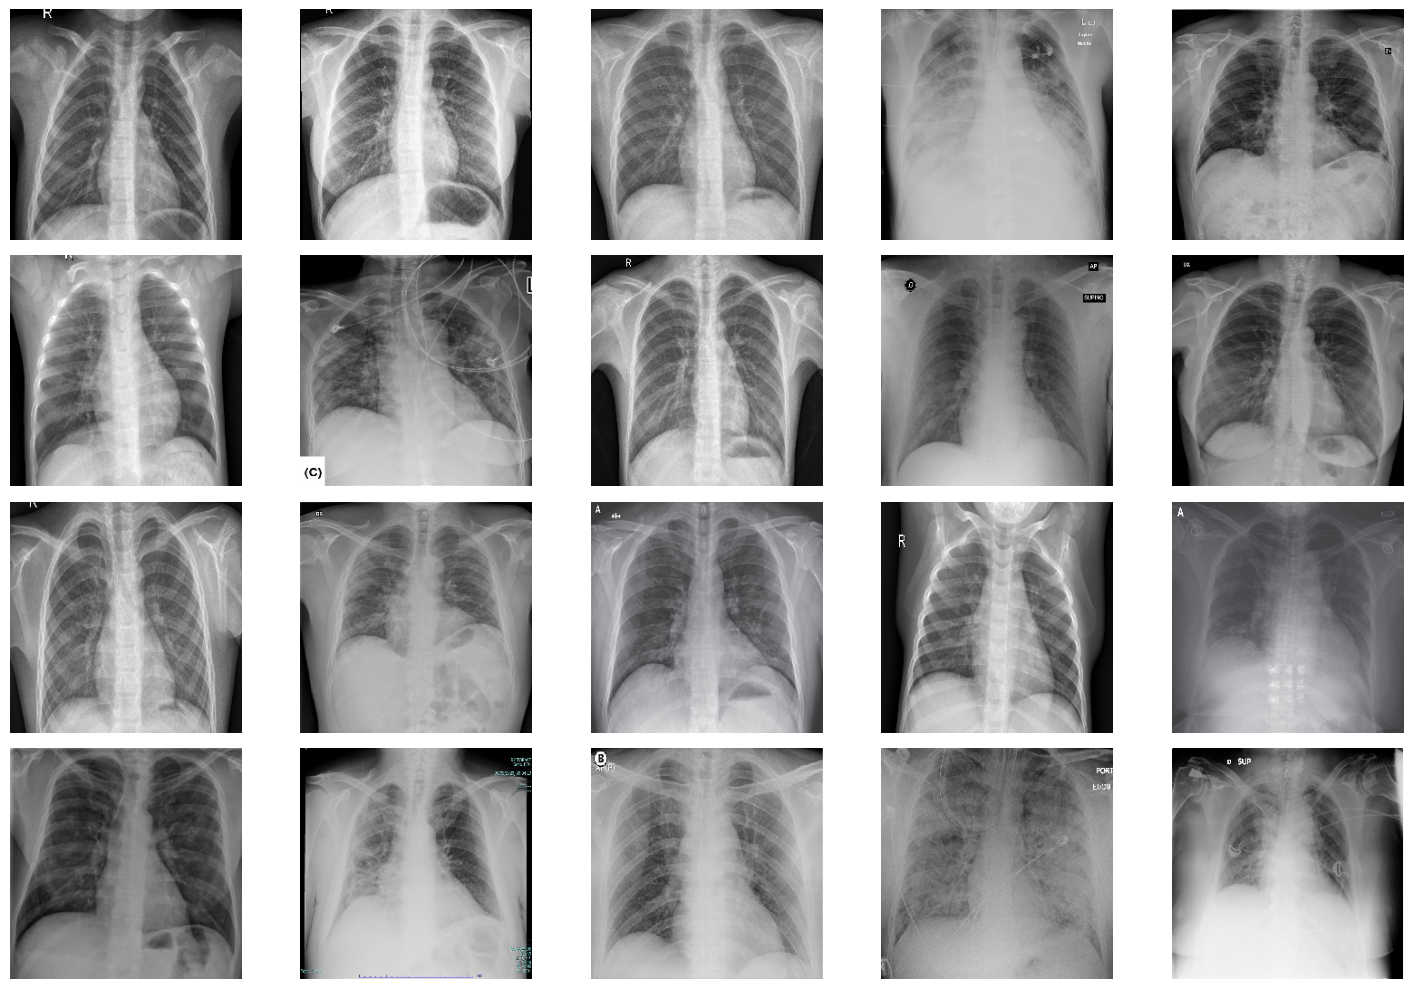

In [102]:
images, labels = next(train_generator)

fig, axes = plt.subplots(4, 5, figsize=(15, 10))

for i in range(20):
    row, col = divmod(i, 5)
    axes[row, col].imshow(images[i])
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

In [103]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(train_generator.num_classes, activation='softmax'))

model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [104]:
steps_per_epoch = train_generator.samples // train_generator.batch_size
validation_steps = test_generator.samples // test_generator.batch_size

In [105]:
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=25,
    validation_data=test_generator,
    validation_steps=validation_steps
)

Epoch 1/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 28s 5s/step - accuracy: 0.5365 - loss: 2.6902 - val_accuracy: 1.0000 - val_loss: 0.3322
Epoch 2/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - accuracy: 0.9000 - loss: 0.4282 - val_accuracy: 0.7500 - val_loss: 0.4732
Epoch 3/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 17s 3s/step - accuracy: 0.6307 - loss: 0.6983
Epoch 4/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 591ms/step - accuracy: 0.8125 - loss: 0.5151 - val_accuracy: 0.5625 - val_loss: 0.4865
Epoch 5/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step - accuracy: 0.7124 - loss: 0.5118 - val_accuracy: 1.0000 - val_loss: 0.1109
Epoch 6/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 44s 14s/step - accuracy: 0.9062 - loss: 0.2753
Epoch 7/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - accuracy: 0.9150 - loss: 0.2725 - val_accuracy: 1.0000 - val_loss: 0.0314
Epoch 8/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.9375 - loss: 0.1823 - val_accuracy: 1.0000 - val_loss: 0.0137
Epoch 9/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 17s 3s/step - accuracy: 0.9552 - loss: 0.1221
Epoch

In [106]:
test_loss, test_accuracy = model.evaluate(test_generator, steps=validation_steps)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.9688 - loss: 0.2353
Test Loss: 0.23526930809020996
Test Accuracy: 96.88%


In [107]:
predictions = model.predict(test_generator, steps=validation_steps)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [108]:
predicted_classes = predictions.argmax(axis=1)

In [109]:
true_classes = test_generator.classes

In [110]:
class_labels = list(test_generator.class_indices.keys())

In [111]:
print("Predicted Classes (First 10):", predicted_classes[:10])
print("True Classes (First 10):", true_classes[:10])

Predicted Classes (First 10): [0 0 1 0 0 1 1 1 1 1]
True Classes (First 10): [0 0 0 0 0 0 0 0 0 0]


In [112]:
print("Class Labels:", class_labels)

Class Labels: ['NORMAL', 'PNEUMONIA']


In [113]:
print(classification_report(true_classes[:len(predicted_classes)], predicted_classes, target_names=class_labels))

              precision    recall  f1-score   support

      NORMAL       0.57      0.40      0.47        20
   PNEUMONIA       0.33      0.50      0.40        12

    accuracy                           0.44        32
   macro avg       0.45      0.45      0.44        32
weighted avg       0.48      0.44      0.44        32

